# Dirichlet Distribution

### Why we need dirichlet disribution?


**Example1**: Assume that weather can be either cloudy or sunny. Now I want to compute the probabilities of today's weather is cloudy and sunny respectively.

|Year | p(weather = cloudy)| p(weather = sunny)|
|-- | -- | -- |
|2016 | 0.3 | 0.7 |
|2017 | 0.2 | 0.8 |
|2018 | 0.3 | 0.7 |
|2019 | 0.2 | 0.8 |
|2020 | ? | ? |

In 2020 I want to predict probability of weather to be a cloudy and sunny, which distribuion can I take over these probabilities?

We can use beta distribution. Here we have two variables <br>
$\theta1 = p(weather = cloudy)$ <br>
$\theta2 = p(weather = sunny)$ <br>

But we can convert it into univariate Beta disribution since we know $\theta1 + \theta2 = 1$ <br>
Assume, $\theta = p(weather = cloudy)$

Hence $1 - \theta = p(weather = sunny)$

$\theta \sim Beta(a,b)$

## Sampling from Beta

In [1]:
try:
    import tensorflow_probability.substrates.jax as tfp
except ModuleNotFoundError:
    %pip install tensorflow-probability
    import tensorflow_probability.substrates.jax as tfp

import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax
import seaborn as sns
import numpy as np
rng_key = jax.random.PRNGKey(0)

try:
    import plotly.figure_factory as ff
except ModuleNotFoundError:
    %pip install plotly scikit-image 
    import plotly.figure_factory as ff
    

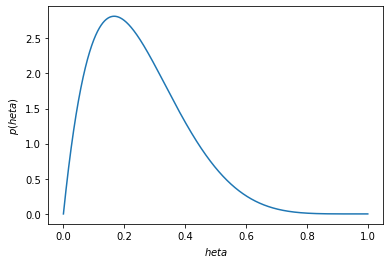

In [2]:
dist = tfp.distributions.Beta(concentration0= 6, concentration1 =2)
x = jnp.linspace(0,1,10000)
plt.figure()
plt.plot(x,dist.prob(x))
plt.xlabel("$\theta$")
plt.ylabel("$p(\theta)$");

In [3]:
dist.sample(sample_shape=10,seed = rng_key)

DeviceArray([0.1230273 , 0.19692048, 0.58094096, 0.26306233, 0.13593626,
             0.05888733, 0.26878887, 0.3711468 , 0.38220716, 0.37653023],            dtype=float32)

**Example2**: Now assume weather can be rainy also.

|Year | p(weather = cloudy)| p(weather = sunny)|  p(weather = rainy)|
|-- | -- | -- | -- |
|2016 | 0.3 | 0.6 | 0.1 |
|2017 | 0.2 | 0.6 | 0.2 |
|2018 | 0.3 | 0.5 | 0.2 |
|2019 | 0.2 | 0.7 | 0.1 |
|2020 | ? | ? | ? |

Now which disrubution can we use?

We can use dirichlet distribution. Here we have three variables, <br>
$\theta1 = p(weather = cloudy)$ <br>
$\theta2 = p(weather = sunny)$ <br>
$\theta3 = p(weather = rainy)$ <br>
$\theta1 + \theta2 + \theta3 = 1$

Dirichler distribution is multivariate extension of beta disribution.

**Beta pdf**:$$
\frac{x^{\alpha-1}(1-x)^{\beta-1}}{\mathrm{~B}(\alpha, \beta)}
$$
where $\mathrm{B}(\alpha, \beta)=\frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha+\beta)}$ and $\Gamma$ is the Gamma function.


**Dirichlet pdf**:$$
\frac{1}{\mathrm{~B}(\boldsymbol{\alpha})} \prod_{i=1}^{K} x_{i}^{\alpha_{i}-1}
$$
where $\mathrm{B}(\boldsymbol{\alpha})=\frac{\prod_{i=1}^{K} \Gamma\left(\alpha_{i}\right)}{\Gamma\left(\sum_{i=1}^{K} \alpha_{i}\right)}$
where $\boldsymbol{\alpha}=\left(\alpha_{1}, \ldots, \alpha_{K}\right)$

## Sampling

In our example $K=3$ <bR>
$p(\boldsymbol{\theta}) \propto (\theta_1)^{\alpha_1-1}(\theta_2)^{\alpha_2-1}(\theta_3)^{\alpha_3-1}$

In [4]:
dist = tfp.distributions.Dirichlet(concentration=(1,1,1))
dist.sample(sample_shape=10,seed=jax.random.PRNGKey(4))

DeviceArray([[0.07584376, 0.1851281 , 0.73902816],
             [0.08150549, 0.06043429, 0.85806024],
             [0.5291344 , 0.2872818 , 0.18358377],
             [0.3053637 , 0.55593014, 0.13870625],
             [0.8189849 , 0.10972024, 0.07129489],
             [0.07830975, 0.24926934, 0.67242104],
             [0.27547845, 0.41870305, 0.3058185 ],
             [0.8666831 , 0.00429375, 0.1290231 ],
             [0.217285  , 0.54882336, 0.23389168],
             [0.16424355, 0.26540357, 0.5703529 ]], dtype=float32)

In [15]:
def draw_sample(a,b,c, n_samples=10000):
    theta_samples = tfp.distributions.Dirichlet(concentration=(a,b,c)).sample(seed=rng_key, sample_shape=n_samples)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter(theta_samples[:,0],
                    theta_samples[:,1],
                    theta_samples[:,2], zdir = 'y')
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_zlim(0,1)
    ax.view_init(45, 30,vertical_axis="x")

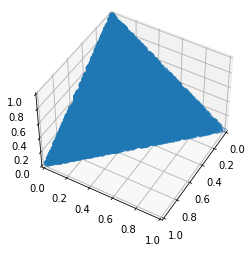

In [16]:
# %matplotlib notebook
draw_sample(1,1,1)

In [17]:
from ipywidgets import interact
# %matplotlib notebook
mx = 10
mn = 0.1
@interact(a=(mn,mx,0.5),b=(mn,mx,0.5),c=(mn,mx,0.5))
def plot(a,b,c):
    draw_sample(a,b,c)

interactive(children=(FloatSlider(value=4.6, description='a', max=10.0, min=0.1, step=0.5), FloatSlider(value=…

3D Density

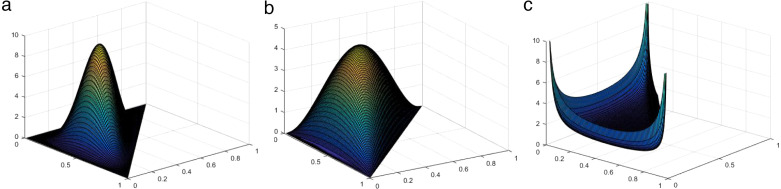

## 2D Visualization

In [8]:
samples = tfp.distributions.Dirichlet([1,1,1]).sample(10000,seed=rng_key)
        
def draw_pdf_contours(alpha):
    dist = tfp.distributions.Dirichlet(alpha)
    probs = np.array(dist.prob(jnp.array(samples)))
    fig = ff.create_ternary_contour(np.array(samples).T, probs, interp_mode='cartesian',
                                    pole_labels=['alpha1', 'alpha2', 'alpha3'],
                                    ncontours=20, colorscale='Viridis', showscale=True)
    fig.show()
    

In [14]:
%matplotlib inline
draw_pdf_contours([5,2,5])

In [13]:
mx = 10
mn = 0.1
@interact(a=(mn,mx,0.5),b=(mn,mx,0.5),c=(mn,mx,0.5))
def plot(a,b,c):
    draw_pdf_contours([a,b,c])

interactive(children=(FloatSlider(value=4.6, description='a', max=10.0, min=0.1, step=0.5), FloatSlider(value=…

Dirichle disribution for K=4

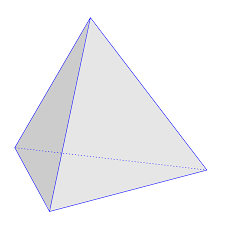